In [5]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

model = ResNet50(weights='imagenet')

In [6]:
import glob

elephants = glob.glob("../images_train/african_elephant/*.jpg")
zebras = glob.glob("../images_train/african_zebra/*.jpg")
all_images = elephants + zebras
print(len(elephants))
print(len(zebras))

175
189


In [7]:
def generate_features(some_image):
    img = image.load_img(some_image, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features

In [104]:
import pandas as pd

features = {}
_features = []

for img in tqdm(all_images):
    _f = generate_features(img)
    features[img] = _f
    _features.append(_f)
    

df = pd.DataFrame(list(features.items()))
df.columns = ['image', 'feature']
df.head()

100%|██████████| 364/364 [01:52<00:00,  3.34it/s]


,image,feature
0,../images_train/african_elephant/african_eleph...,"[[5.3644e-06, 1.03286e-08, 2.63065e-08, 2.3738..."
1,../images_train/african_elephant/african_eleph...,"[[7.79265e-07, 2.88982e-08, 1.92784e-08, 9.830..."
2,../images_train/african_elephant/african_eleph...,"[[1.71448e-10, 2.89925e-12, 5.80172e-11, 4.782..."
3,../images_train/african_elephant/african_eleph...,"[[1.20412e-09, 1.42676e-11, 2.64773e-11, 6.912..."
4,../images_train/african_elephant/african_eleph...,"[[2.00127e-08, 9.86225e-09, 1.04519e-07, 3.291..."


In [105]:
sdf = np.array(_features).squeeze()
sdf.shape

(364, 1000)

In [125]:
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

paired_distances?

In [129]:
feature_dist = pairwise_distances(sdf, metric='cosine')

In [130]:
feature_dist[0][140]

0.006704092

In [134]:
np.argsort(feature_dist[0])[::-1][:10] # Provides the distance rankings from lowest to highest

array([288, 170, 332, 191, 320, 336, 313, 318, 201, 309])

In [139]:
df[df.index.isin(np.argsort(feature_dist[0])[::-1][:10])]

,image,feature
170,../images_train/african_zebra/african_zebra_16...,"[[2.76553e-09, 2.9494e-09, 5.56713e-09, 6.6071..."
191,../images_train/african_zebra/african_zebra_64...,"[[1.00265e-07, 5.69432e-08, 1.15324e-06, 2.179..."
201,../images_train/african_elephant/african_eleph...,"[[2.93622e-07, 3.32742e-09, 1.20321e-08, 2.319..."
288,../images_train/african_zebra/african_zebra_19...,"[[8.34502e-08, 2.12944e-09, 1.96177e-08, 3.315..."
309,../images_train/african_zebra/african_zebra_19...,"[[4.05742e-07, 1.17439e-08, 1.78927e-07, 8.476..."
313,../images_train/african_zebra/african_zebra_23...,"[[1.82352e-07, 1.78183e-08, 1.80118e-07, 2.995..."
318,../images_train/african_zebra/african_zebra_14...,"[[8.27674e-09, 3.46018e-10, 5.02814e-10, 1.029..."
320,../images_train/african_zebra/african_zebra_20...,"[[1.56259e-05, 5.18719e-06, 1.07094e-05, 4.489..."
332,../images_train/african_elephant/african_eleph...,"[[2.88251e-09, 2.55973e-10, 9.86431e-10, 3.938..."
336,../images_train/african_zebra/african_zebra_12...,"[[2.14655e-08, 2.19078e-07, 8.45803e-07, 4.290..."


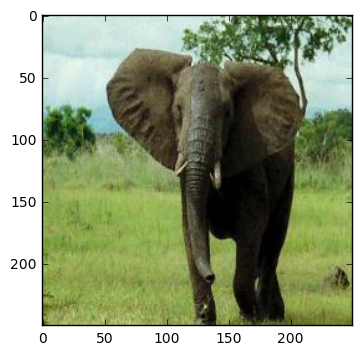

In [140]:
img = plt.imread(df.iloc[0].image)
plt.imshow(img)

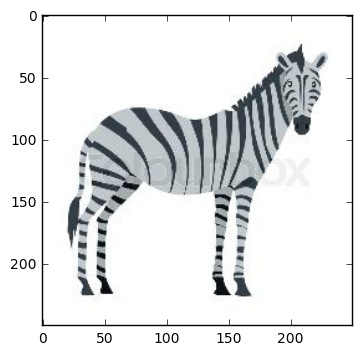

In [142]:
img = plt.imread(df.iloc[191].image)
plt.imshow(img)